# <center> THE SPARKS FOUNDATION VIRTUAL INTERNSHIP </center>

# Task 2 - Exploratory Data Analysis on Sample Store Dataset

## Notebook by - Chirag M Naik

## Given Problem Statement

* As a business manager, try to find out the weak areas where you can work to make more profit. 

### Importing required libraries

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

### Loading and understanding the dataset

In [19]:
df=pd.read_csv("SampleSuperstore.csv")

df.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


### Exploratory Data Analysis

In [32]:
#checking for null values
df.isnull().sum()

# There are no null values in any columns in the dataset

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [25]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [24]:
#postal code is a object type

df["Postal Code"]=df["Postal Code"].astype("object")

In [26]:
df.shape

(9994, 13)

In [27]:
#unique variables in the column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [28]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [33]:
#summary of bject type
df.describe(include="object").T

,count,unique,top,freq
Ship Mode,9994,4,Standard Class,5968
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001
Postal Code,9994,631,10035,263
Region,9994,4,West,3203
Category,9994,3,Office Supplies,6026
Sub-Category,9994,17,Binders,1523


### Checking for correlation and variance

In [34]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


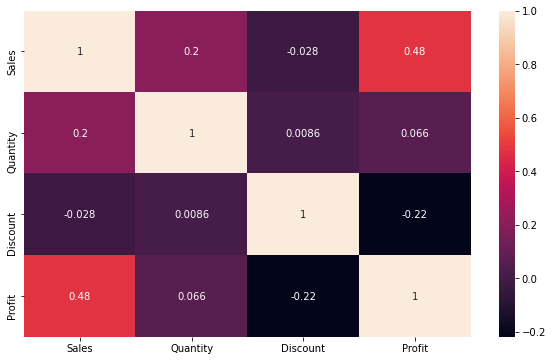

In [36]:
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(),annot=True)
plt.show()

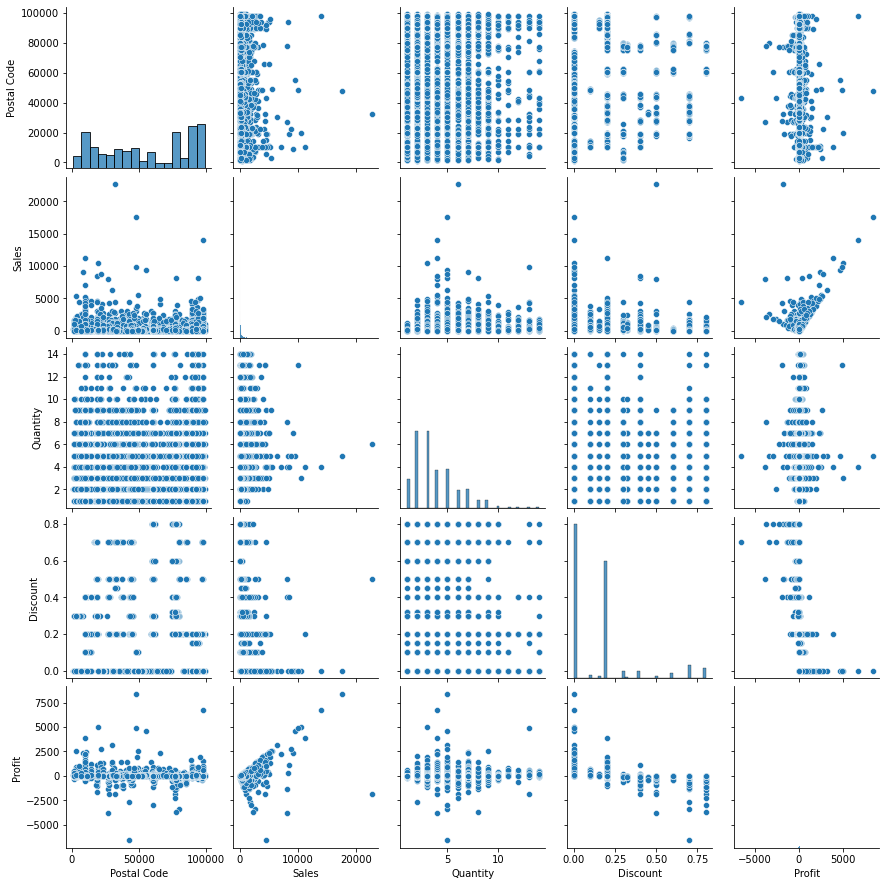

In [49]:
sns.pairplot(df)
plt.show()

### Checking for realtoionship between cateroical columns and profit

In [39]:
df_cat=df.select_dtypes(include='object')
df_cat.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category'],
      dtype='object')

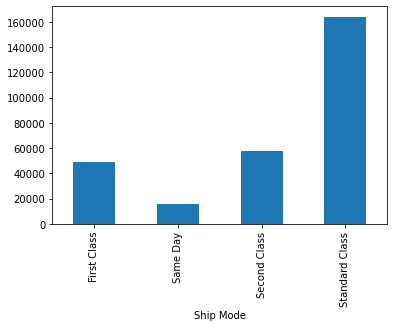

In [69]:
#ship mode affecting profit 
df.groupby('Ship Mode')['Profit'].sum().plot(kind='bar')
plt.show()

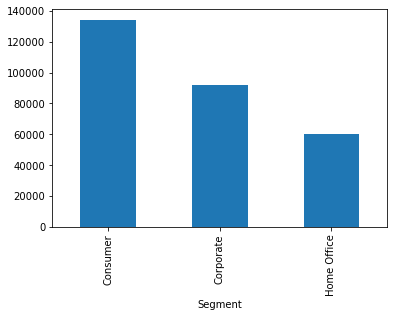

In [68]:
#segment affecting profit
df.groupby('Segment')['Profit'].sum().plot(kind='bar')
plt.show()

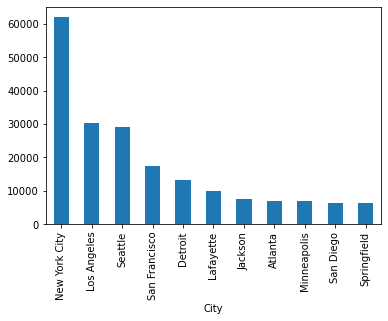

In [76]:
# top 10 cities with highest highestprofit
df.groupby('City')['Profit'].sum().sort_values(ascending=False)[:11].plot(kind='bar')
plt.show()

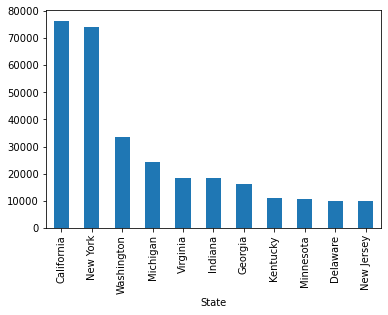

In [75]:
#top 10 statewise profit
df.groupby('State')['Profit'].sum().sort_values(ascending=False)[:11].plot(kind='bar')
plt.show()

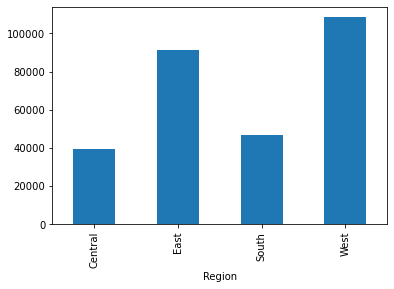

In [77]:
#region wise profit
df.groupby('Region')['Profit'].sum().plot(kind='bar')
plt.show()

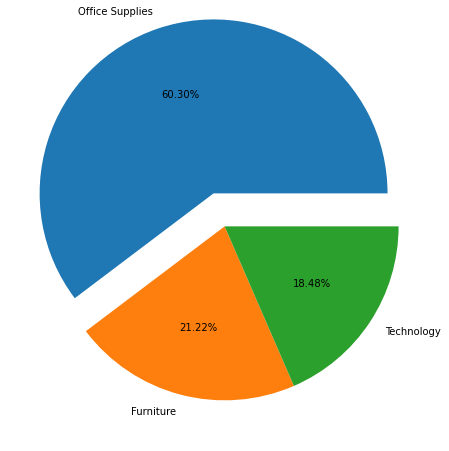

In [78]:
#category spread
plt.figure(figsize = (15,8))
plt.pie(df['Category'].value_counts(), labels =df['Category'].value_counts().index, autopct = '%.2f%%',explode = [0.2,0,0])
plt.show()

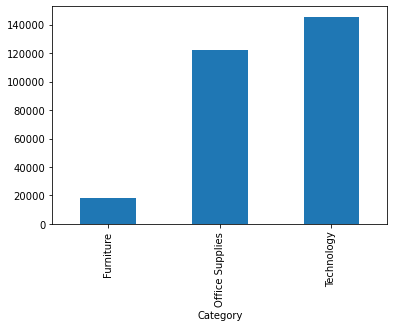

In [74]:
#category wise profit
df.groupby('Category')['Profit'].sum().plot(kind='bar')
plt.show()

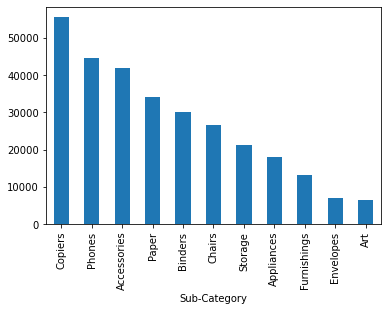

In [79]:
#subcategory wise profit
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)[:11].plot(kind='bar')
plt.show()

 The superstore data is of the country **'United States'**
* The superstore sells its products in **49 states and 531 cities of the United States**
* The **top city and state** in terms of frequency are **'New York' and 'California' respectively**
* The superstore delivers the products in all the **4 regions** of the United States **i.e East, West, Central and South regions** with the **Western region having maximum count**
* The superstore delivers the products using **4 modes of shipment. They are 'First Class', 'Second Class', 'Standard Class' and 'Same day'. The 'Standard Class' ship mode is used the most by the customers**
* The superstore sells their products in **3 categories namely Office Supplies, Furniture and Technology**. 
* Under these categories, the products are further divided into **17 sub-categories**. Some of them are **Binders, Paper, Art, Storage, Appliances, Machines, Copiers, Bookcases, etc.**
* Total Sales = **2.30M**
* Total Profit = **286.40K**
* Total Quantity Sold = **37873**
* Total Orders = **9994**

> ## Bivariate Analysis

### 1. With respect to 'Sales'

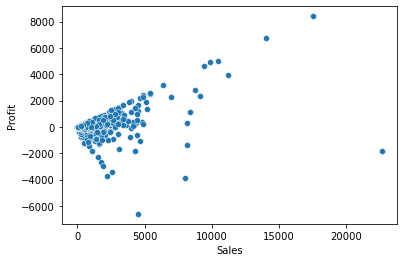

In [109]:
sns.scatterplot(df["Sales"],df["Profit"])
plt.show()

% Sales Regionwise


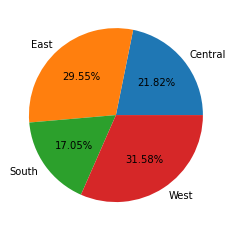

In [6]:
print("% Sales Regionwise")
plt.pie(df['Sales'].groupby(df.Region).sum(), 
        labels = df['Sales'].groupby(df.Region).sum().index,
        autopct = '%.2f%%')
plt.show()

% Sales Sub-Category wise


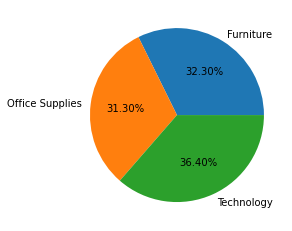

In [7]:
print("% Sales Category wise")
plt.pie(df['Sales'].groupby(df.Category).sum(), 
        labels = df['Sales'].groupby(df.Category).sum().index,
        autopct = '%.2f%%')
plt.show()

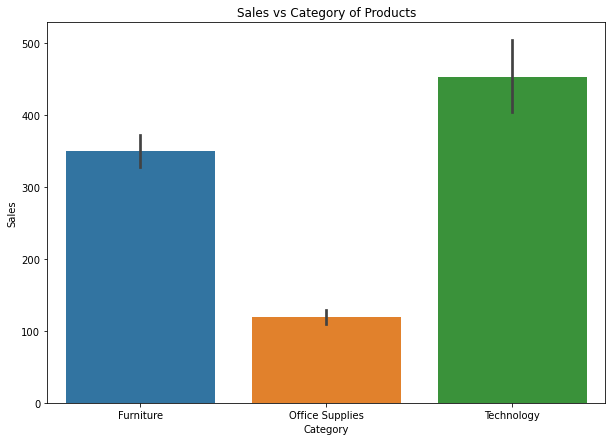

In [11]:
plt.figure(figsize = (10,7))
plt.title('Sales vs Category of Products')
sns.barplot(df['Category'],df['Sales'])
plt.show()

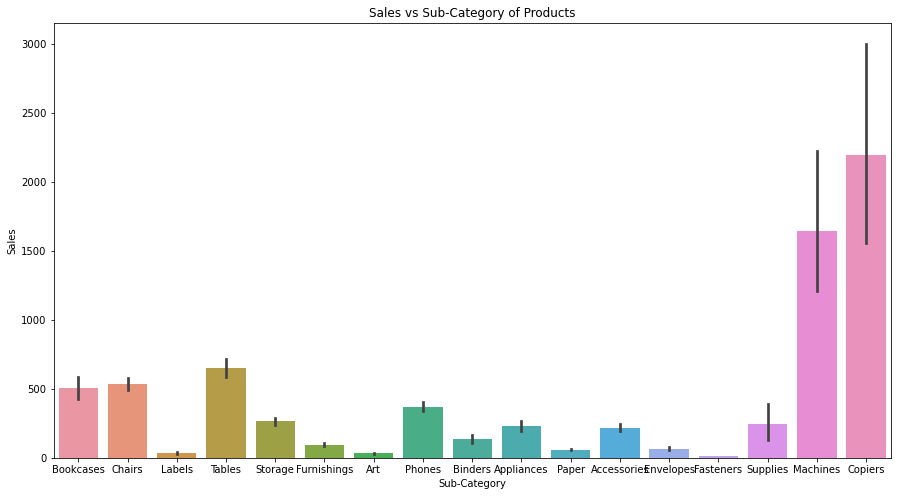

In [16]:
plt.figure(figsize=(15,8))
plt.title('Sales vs Sub-Category of Products')
sns.barplot(x ='Sub-Category', y ='Sales', data=df)
plt.show()

### 2. With respect to 'Profit'

% Profit Regionwise


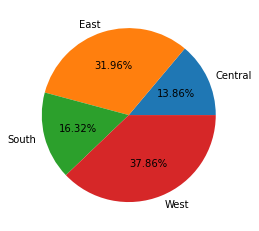

In [14]:
print("% Profit Regionwise")
plt.pie(df["Profit"].groupby(df.Region).sum(), 
        labels = df['Profit'].groupby(df.Region).sum().index,
        autopct = '%.2f%%')
plt.show()

% Profit Sub-Category wise


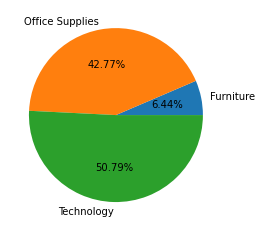

In [15]:
print("% Profit Category wise")
plt.pie(df['Profit'].groupby(df.Category).sum(), 
        labels = df['Profit'].groupby(df.Category).sum().index,
        autopct = '%.2f%%')
plt.show()

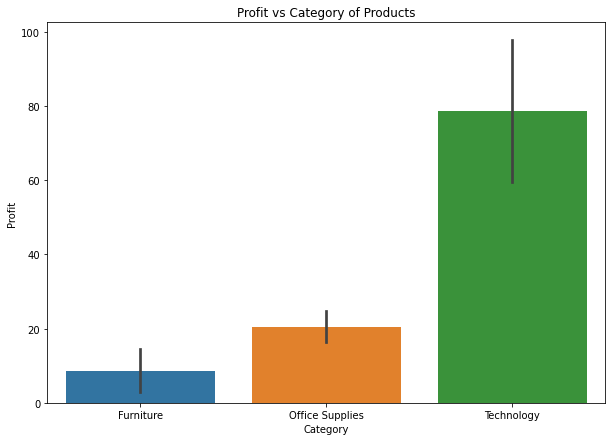

In [18]:
plt.figure(figsize = (10,7))
plt.title('Profit vs Category of Products')
sns.barplot(df['Category'],df['Profit'])
plt.show()

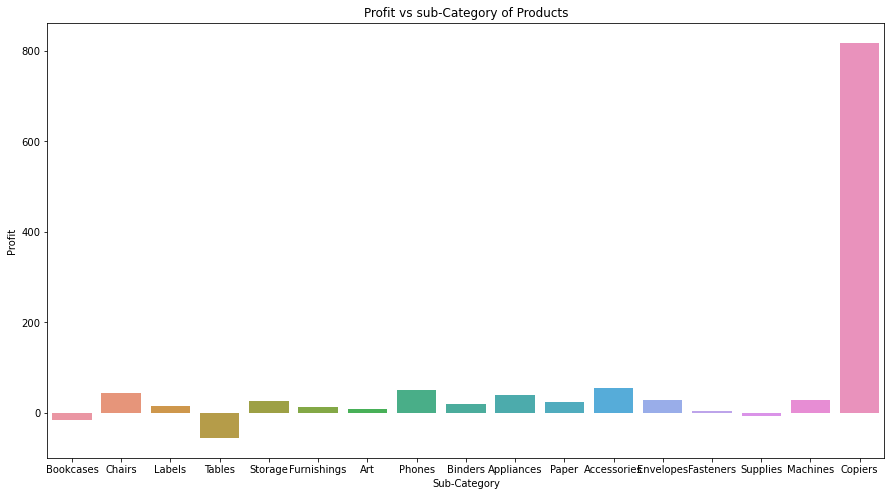

In [4]:
plt.figure(figsize=(15,8))
plt.title('Profit vs sub-Category of Products')
sns.barplot(x ='Sub-Category', y ='Profit', data=df,ci=0)
plt.show()

> ## Insights derived from Bivariate Analysis

* The **Western Region** has the **most Sales** contributing about **32% of the total Sales** 
* The **Southern Region** has the **lowest Sales** contributing about **17% of the total Sales**
* Products under the **Category of 'Technology' generate the maximum Sales**
* The **Top 5 selling products** are from the following Sub-Category - **Copiers, Machines,tables, Chairs and Bookcases**
* **Western Region** also contributes the **most in total Profit (with about 38% out of the total Profit)** while the **Central Region** contributes **the least to the Profit(with only 13% out of the total Profit)**
* Products under the **Category of 'Technology' generates the maximum Profit**
* Out of the **Top 5 selling Sub-Categories, only Copiers, Machines and phones have managed to earn Profit**


> ## Multivariate Analysis

In [7]:
df.describe(include="object")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,631,4,3,17
top,Standard Class,Consumer,United States,New York City,California,10035,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,263,3203,6026,1523


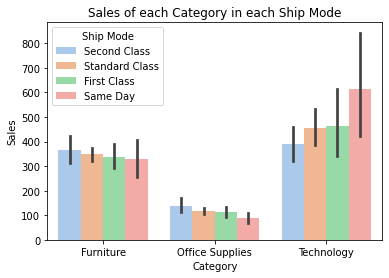

In [20]:

plt.title('Sales of each Category in each Ship Mode')
sns.barplot(x = 'Category', y = 'Sales', data = df, hue = df['Ship Mode'], palette = 'pastel')
plt.show()

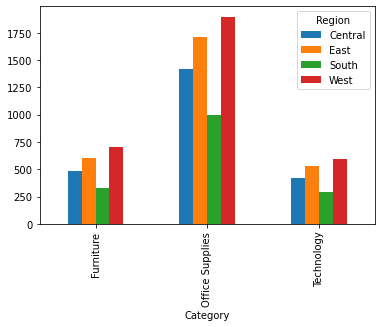

In [19]:
plt.title("Regionwise Categories Count")
pd.crosstab(df["Category"],df["Region"]).plot(kind="bar")
plt.show()

> ## Insights derived from Multivariate Analysis

Products under the **category of 'Technology'** has the **highest sales** and the **preferred Ship Mode is 'Same Day'.** **'Second Class'** ship mode is the **least preferred** for products under Technology
* **Highest quantity** of products sold belong to the **Office Supplies** and they are sold the **most in the Western Region** followed by the Eastern Region
* Sales is highly correlated with Profit and Quantity** while **Discount** is positively correlated to **Quantity**

# <center> THANKYOU ! </center>